# Sebastián González Juárez
## Tarea 6

Aplica el método de PCA al conjunto de datos de Iris para demostrar cómo se puede reducir de 4 dimensiones a 2, manteniendo la mayor parte de la información, para ello, no olvides graficar el porcentaje de la varianza total. Podrás consultar más detalles en la sección 7 del archivo pdf de la clase 6.

Importamos paquetería y esta vez mejor cargamos el conjunto de datos Iris desde sklearn.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

La sig. celda solo lo hago para ver que se cargara bien el csv que ya conocía.

In [ ]:
print(load_iris())

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

# Mostremos el archivo

In [ ]:
iris = load_iris(as_frame=True)
iris_df = iris.frame
X = iris_df[iris['feature_names']]
print(X.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In [ ]:
iris = load_iris(as_frame=True)
df = iris.frame
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
print(df.describe())

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


estandarizar los datos. es necesario escalar las características en los datos antes de aplicar el método PCA

In [ ]:
X_mean = X.mean()
X_std = X.std()
Z = (X - X_mean) / X_std

matriz de covarianza

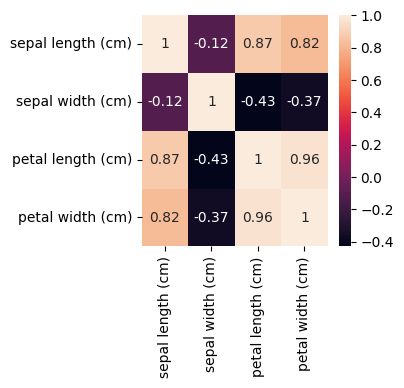

In [ ]:
c = Z.cov()
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(3, 3))
sns.heatmap(c, annot=True)
plt.show()

calcularemos los valores propios y los vectores propios

In [ ]:
eigenvalues, eigenvectors = np.linalg.eig(c)
print('Valores propios:\n', eigenvalues)
print('Forma de los valores propios:', eigenvalues.shape)
print('Forma de los vectores propios:', eigenvectors.shape)

Valores propios:
 [2.91849782 0.91403047 0.14675688 0.02071484]
Forma de los valores propios: (4,)
Forma de los vectores propios: (4, 4)


In [ ]:
idx = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]
print('Valores propios ordenados:\n', eigenvalues)
print('Forma de los valores propios:', eigenvalues.shape)
print('Forma de los vectores propios:', eigenvectors.shape)

Valores propios ordenados:
 [2.91849782 0.91403047 0.14675688 0.02071484]
Forma de los valores propios: (4,)
Forma de los vectores propios: (4, 4)


La varianza explicada nos da una idea de la cantidad de varianza total que ha sido retenida

[2.91849782 3.83252829 3.97928516 4.        ]
4.000000000000003
[0.72962445 0.95813207 0.99482129 1.        ]


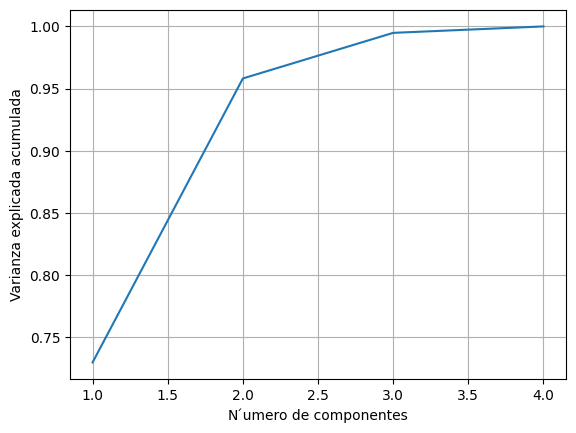

In [ ]:
explained_var = np.cumsum(eigenvalues) / np.sum(eigenvalues)
print(np.cumsum(eigenvalues))
print(np.sum(eigenvalues))
print(explained_var)
plt.plot(range(1, len(explained_var) + 1), explained_var)
plt.xlabel("N ́umero de componentes")
plt.ylabel("Varianza explicada acumulada")
plt.grid()
plt.show()

Demos los componentes principales y serán los que tengan varianza mayor al 90%

In [ ]:
n_components = np.argmax(explained_var >= 0.9) + 1
print(f"Num. de componentes principales: {n_components}")

Num. de componentes principales: 2


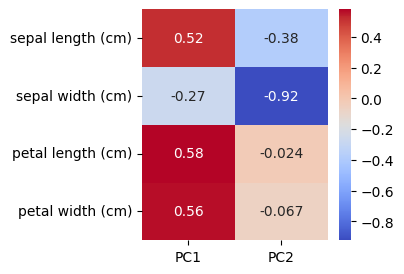

In [ ]:
u = eigenvectors[:, :2]
pca_component = pd.DataFrame(u,index=iris['feature_names'],columns=['PC1', 'PC2'])
plt.figure(figsize=(3, 3))
sns.heatmap(pca_component, annot=True, cmap='coolwarm')
plt.show()

Proyectamos los datos y así reducir  dimensionalidad con producto punto

In [ ]:
Z_pca = Z @ pca_component
Z_pca.columns = ['PCA1', 'PCA2']
print(Z_pca)

         PCA1      PCA2
0   -2.257141 -0.478424
1   -2.074013  0.671883
2   -2.356335  0.340766
3   -2.291707  0.595400
4   -2.381863 -0.644676
..        ...       ...
145  1.864258 -0.385674
146  1.559356  0.893693
147  1.516091 -0.268171
148  1.368204 -1.007878
149  0.957448  0.024250

[150 rows x 2 columns]


correlación entre las componentes principales

In [ ]:
print(Z_pca[['PCA1', 'PCA2']].corr())

              PCA1          PCA2
PCA1  1.000000e+00  5.186670e-16
PCA2  5.186670e-16  1.000000e+00


Grafiquemos las tres tipos de flores según la componente principal

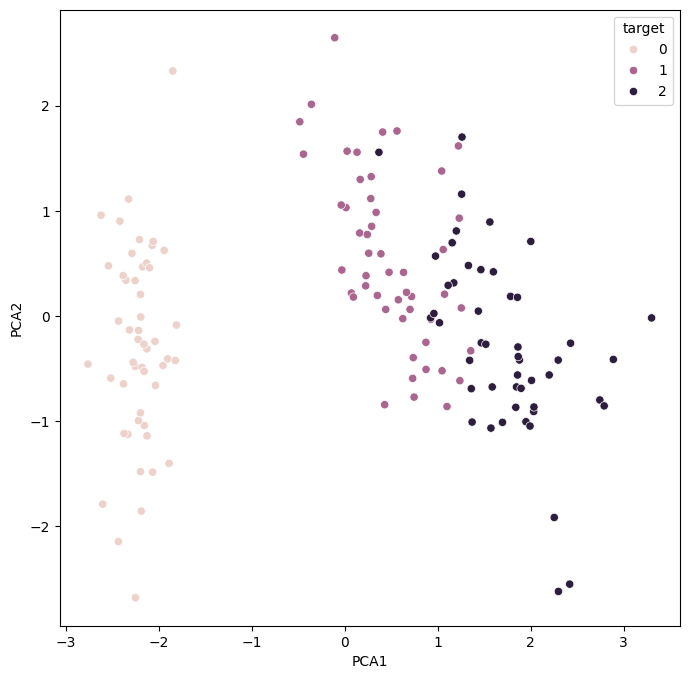

In [ ]:
Z_pca['target'] = iris_df['target']
plt.figure(figsize=(8,8))
sns.scatterplot(data=Z_pca, x="PCA1", y="PCA2", hue="target")
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

umbral1 = Z_pca[Z_pca['target'] == 0]['PCA1'].median()
umbral2 = Z_pca[Z_pca['target'] == 0]['PCA2'].median()
Z_pca['pred_pca'] = ((Z_pca['PCA1'] >= umbral1)
| (Z_pca['PCA2'] >= umbral2)).astype(int)
cm_pca12 = confusion_matrix(Z_pca['target'], Z_pca['pred_pca'])
print(accuracy_score(Z_pca['target'], Z_pca['pred_pca']))
print(precision_score(Z_pca['target'], Z_pca['pred_pca'], average='weighted'))
print(recall_score(Z_pca['target'], Z_pca['pred_pca'], average='weighted'))
print(f1_score(Z_pca['target'], Z_pca['pred_pca'], average='weighted'))

0.4066666666666667
0.4532374100719424
0.4066666666666667
0.29658542226848233


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


El análisis de las métricas muestra que la precisión no es tan buena como se esperaba. Esto hace que me pregunte si realmente es útil reducir la dimensionalidad, especialmente cuando hay pocas variables, porque la predicción no es tan efectiva. Además, no siempre es fácil determinar los mejores parámetros solo con la intuición.

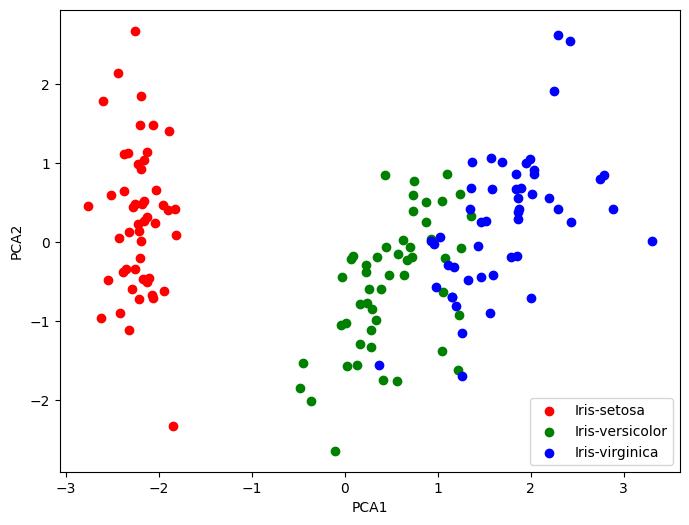

In [ ]:
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
pca.fit(Z)
x_pca = pca.transform(Z)
df_pca1 = pd.DataFrame(x_pca, columns=['PC{}'.format(i+1) for i in range(pca.n_components_)])
plt.figure(figsize=(8, 6))
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'] # Dic. de tipos de iris
colors = ['r', 'g', 'b']  # Dic. de colores
for target, color in zip(targets, colors):
    indicesToKeep = iris_df['target'] == targets.index(target)
    plt.scatter(df_pca1.loc[indicesToKeep, 'PC1'],df_pca1.loc[indicesToKeep, 'PC2'],c=color,label=target)
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.show()